**Imports**

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings 
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])#['Y']/df['Loan_Status'].size

Counter({'Y': 332, 'N': 148})

**Preprocessamento de Dados**

In [3]:
pre_y = df['Loan_Status']
pre_x = df.drop('Loan_Status', axis=1)
dm_x = pd.get_dummies(pre_x)
dm_y = pre_y.map(dict(Y=1, N=0)) 
#pre_y.shape
#pre_x
#dm_x
#dm_y

In [4]:
#percentage = 0.15  # 15%
#sampled_dm_x = dm_x.sample(frac=percentage, random_state=42)

#sampled_dm_x.to_excel('teste.xlsx', index=False)

**Analíse SMOTE**

In [5]:
smote = SMOTE(sampling_strategy='minority')
x1, y = smote.fit_resample(dm_x, dm_y)
sc = MinMaxScaler()
x = sc.fit_transform(x1)
#Counter(y)
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

__Dados de Teste x Dados de Treino__

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True)

In [8]:
x_test

array([[0.        , 0.05689549, 0.06894819, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.24217687, 0.15562845, ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.04745826, 0.04169991, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.04879406, 0.10187073, ..., 1.        , 0.        ,
        0.        ],
       [0.6526896 , 0.04382189, 0.09681289, ..., 0.        , 1.        ,
        0.        ],
       [0.326702  , 0.0421645 , 0.1331375 , ..., 0.        , 1.        ,
        1.        ]])

**Rede Neural**

In [9]:
clf = Sequential()
clf.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=x_test.shape[1]))
clf.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
clf.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
clf.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf.fit(x_train, y_train, batch_size=20, epochs=40, verbose=0)
eval_model = clf.evaluate(x_train, y_train)
eval_model

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8951 - loss: 0.2889  


[0.2798120379447937, 0.9016064405441284]

In [10]:
y_pred = clf.predict(x_test)
y_pred = (y_pred>0.5)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


__Matriz Confusão__

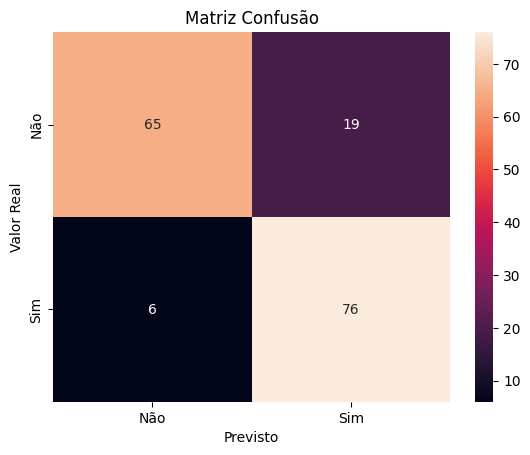

In [11]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);

#Titulos, rotulos e pontos
ax.set_xlabel('Previsto'); ax.set_ylabel('Valor Real');
ax.set_title('Matriz Confusão');
ax.xaxis.set_ticklabels(['Não', 'Sim']); ax.yaxis.set_ticklabels(['Não', 'Sim']);

Export

In [12]:
import pickle

def serialize_model(model):
    model_json = model.to_json()
    return model_json, model.get_weights()

# Salvar o modelo
model_json, model_weights = serialize_model(clf)
with open('emprestimo.pkl', 'wb') as f:
    pickle.dump((model_json, model_weights), f)
